<a href="https://colab.research.google.com/github/thw96/Sales-Forecasting-and-EDA-Challenge/blob/master/Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
%%html
<marquee style='width: 70%; color: Green;font-size:30px;
'><b>Welcome to
Sales EDA!</b></marquee>

In [2]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint 
import seaborn as sns
import matplotlib
import datetime

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_excel('/content/drive/My Drive/Sales EDA/Sample - Superstore.xlsx')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
pprint(set(df['Sub-Category']))

{'Accessories',
 'Appliances',
 'Art',
 'Binders',
 'Bookcases',
 'Chairs',
 'Copiers',
 'Envelopes',
 'Fasteners',
 'Furnishings',
 'Labels',
 'Machines',
 'Paper',
 'Phones',
 'Storage',
 'Supplies',
 'Tables'}


In [5]:
df['Ship Mode'] = df['Ship Mode'].astype('category',copy=False)
df['Segment'] = df['Segment'].astype('category',copy=False)
df['Country'] = df['Country'].astype('category',copy=False)
df['City'] = df['City'].astype('category',copy=False)
df['State'] = df['State'].astype('category',copy=False)
df['Category'] = df['Category'].astype('category',copy=False)

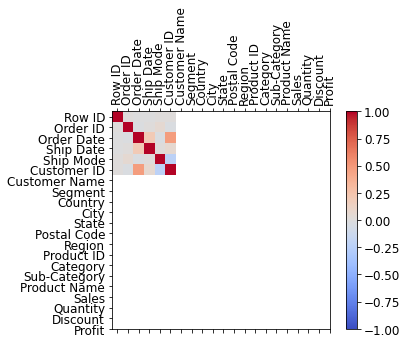

In [6]:
#used th Pearson correlation
corr=df.corr(method ='pearson') 
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   category      
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   category      
 8   Country        9994 non-null   category      
 9   City           9994 non-null   category      
 10  State          9994 non-null   category      
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   category      
 15  Sub-Category   9994 n

In [8]:
print(df['Sales'].describe())

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


In [9]:
# Checking the missing values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [10]:
# Find the mode of month in data
Postal_mode = df['Postal Code'].mode()[0]

# Fill the missing values with mode value of month in data.
df['Postal Code'].fillna(Postal_mode, inplace = True)

# Let's see the null values in the month column.
df['Postal Code'].isnull().sum()

0

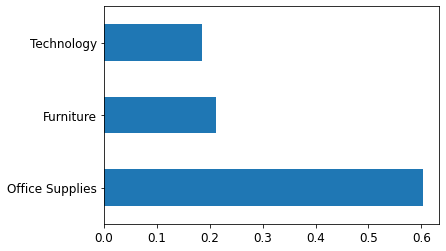

In [11]:
# Let's calculate the percentage of each job status category.
df['Category'].value_counts(normalize=True)

#plot the bar graph of percentage job categories
df['Category'].value_counts(normalize=True).plot.barh()
plt.show()

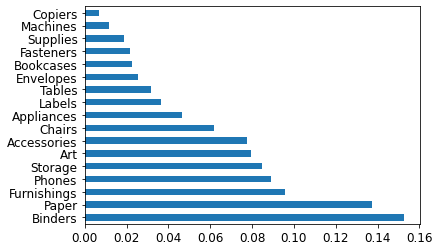

In [12]:
# Let's calculate the percentage of each job status category.
df['Sub-Category'].value_counts(normalize=True)

#plot the bar graph of percentage job categories
df['Sub-Category'].value_counts(normalize=True).plot.barh()
plt.show()

****


Check Outliers
---




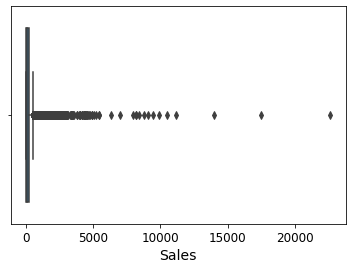

In [ ]:
sns.boxplot(x=df['Sales'])

Outliers exist where the sales > 1200

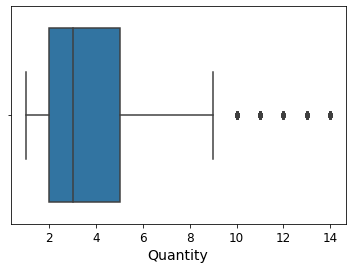

In [ ]:
sns.boxplot(x=df['Quantity'])

Outliers exist after Quantity > 10

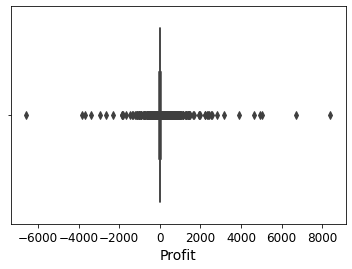

In [ ]:
sns.boxplot(x=df['Profit'])

Outliers exist where Profit > 6000 and Profit < -4000

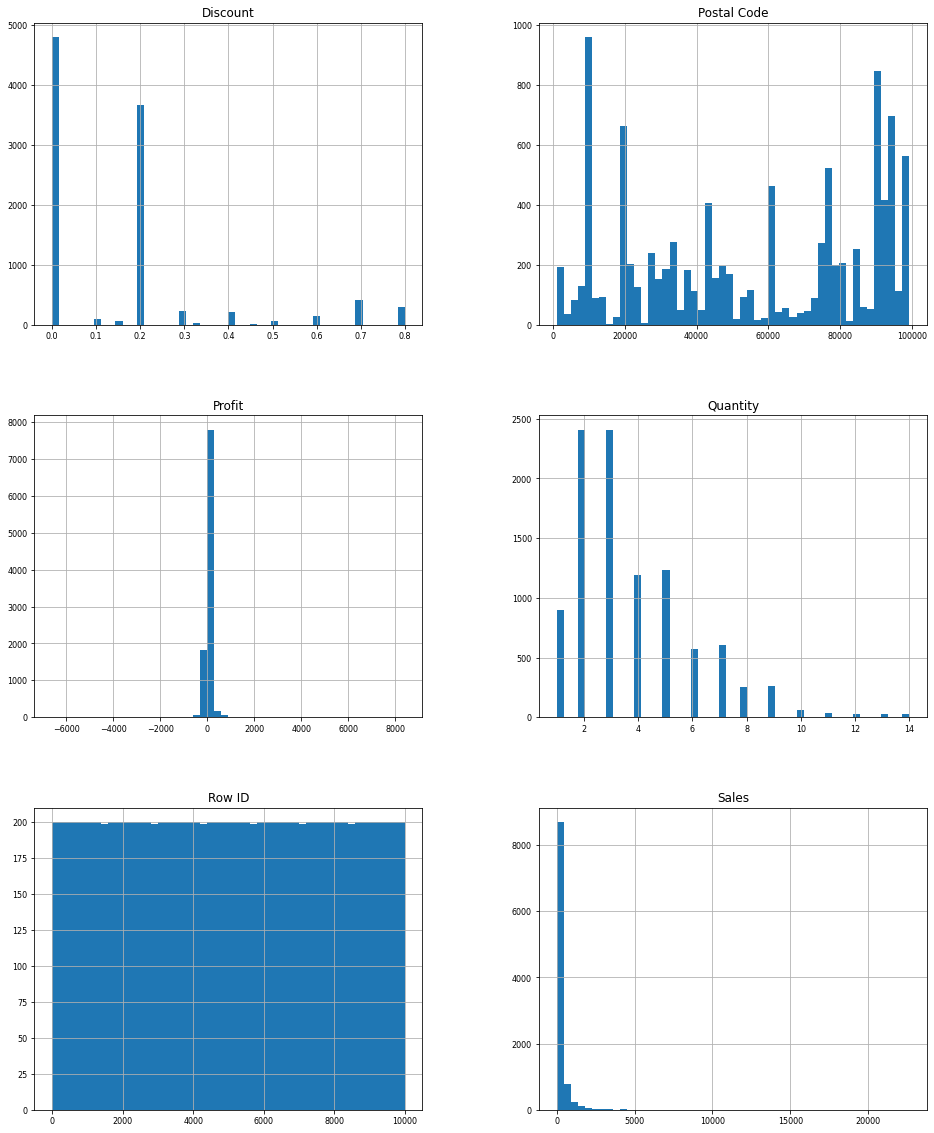

In [ ]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

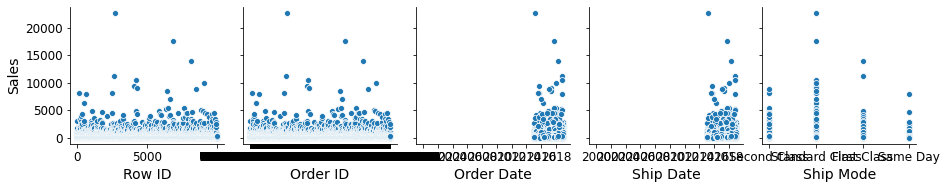

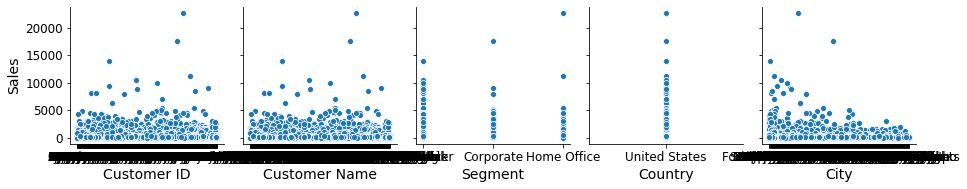

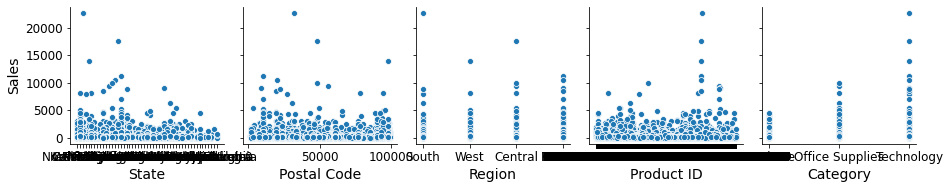

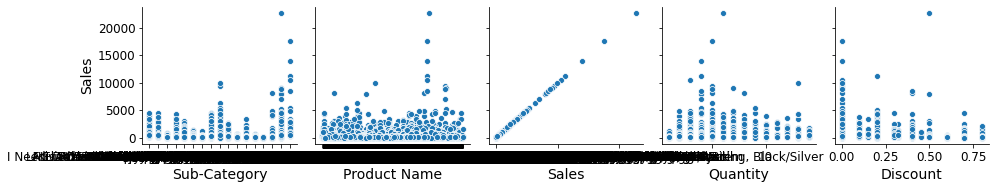

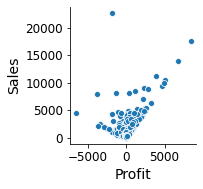

In [ ]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['Sales'])

Category Distributions

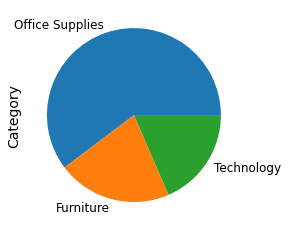

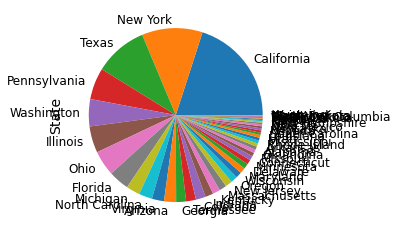

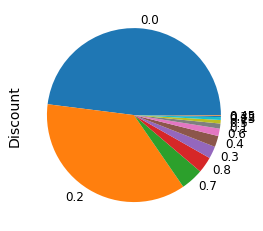

In [13]:
df['Category'].value_counts(normalize=True).plot.pie()
plt.show()

df['State'].value_counts(normalize=True).plot.pie()
plt.show()

df['Discount'].value_counts(normalize=True).plot.pie()
plt.show()

Correlations between numerical variables

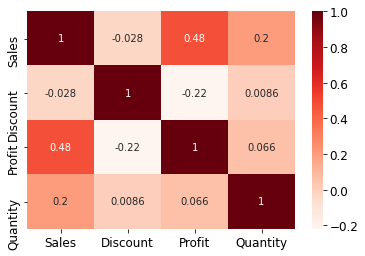

In [ ]:
# Creating a matrix using age, salry, balance as rows and columns
df[['Sales','Discount','State','Profit','Quantity','State','Ship Mode']].corr()

#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(df[['Sales','Discount','State','Profit','Quantity','State','Ship Mode']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [14]:
grouped = df.groupby(['State','Category']).agg({'Sales' : ['count','mean','min','max']})
grouped.columns = ['Count', 'Mean', 'Min','Max']
grouped = grouped.reset_index()
grouped

,State,Category,Count,Mean,Min,Max
0,Alabama,Furniture,11,575.680000,8.960,1819.860
1,Alabama,Office Supplies,36,116.918889,3.620,900.080
2,Alabama,Technology,14,640.648571,25.980,3040.000
3,Arizona,Furniture,49,276.026347,4.272,1272.630
4,Arizona,Office Supplies,127,78.786024,1.408,1113.024
...,...,...,...,...,...,...
142,Wisconsin,Office Supplies,53,114.336604,1.810,1089.750
143,Wisconsin,Technology,25,351.926400,1.980,1649.750
144,Wyoming,Furniture,1,1603.136000,1603.136,1603.136
145,Wyoming,Office Supplies,0,NaN,NaN,NaN


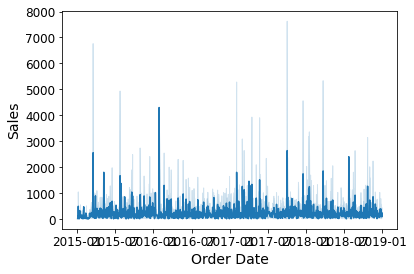

In [15]:
ax = sns.lineplot(x=df['Order Date'], y="Sales", data=df)

In [16]:
grouped['month']=df['Ship Date']
grouped
grouped['month'] = grouped['month'].dt.month

Month wise Sales distribution


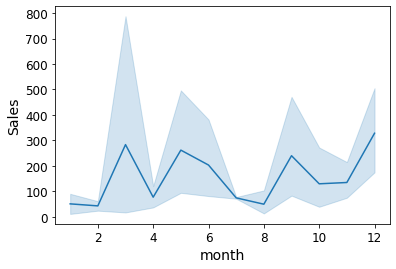

In [24]:
ax = sns.lineplot(x=grouped['month'], y="Sales", data=df,sizes=1)

Sales - Sub Category graph

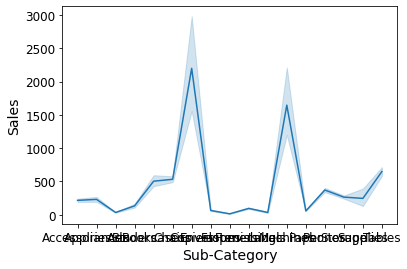

In [18]:
ax = sns.lineplot(x=df['Sub-Category'], y="Sales", data=df, sizes=1)

#Visualizing Furniture Sales Time Series Data


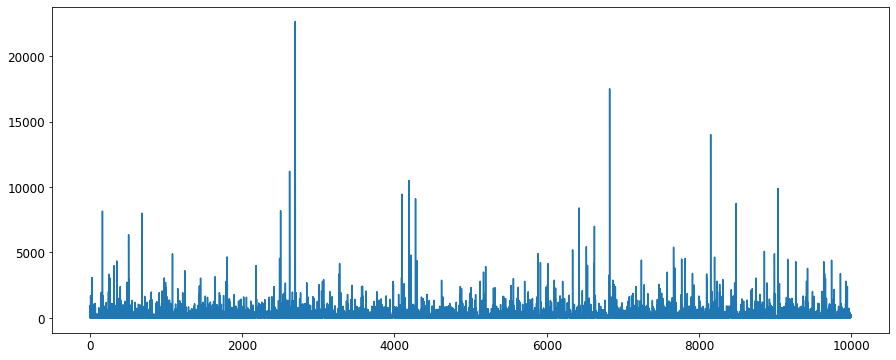

In [ ]:
df['Sales'].plot(figsize=(15, 6))
plt.show()